In [403]:
#Team 27
#Κινους Βασιλειος Αλεξανδρος
#8834

# Exercise1

In [336]:
#Import the libraries that will be needed


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler,RobustScaler,normalize
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit


#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data into a pandas dataframe

df = pd.read_csv ('C:/Users/alexk/Downloads/dataset.csv',header=None,names=["A","B","Class"])

In [3]:
#Sample preview

df.head()

,A,B,Class
0,1.8036,4.4229,3
1,3.4615,4.1436,2
2,2.1873,3.9964,1
3,3.0933,2.9056,1
4,1.7586,2.4109,1


In [5]:
#Change target labels from 1-2-3 to 0-1-2 

df["Class"][df["Class"]==1] = 0

df["Class"][df["Class"]==2] = 1

df["Class"][df["Class"]==3] = 2

In [6]:
df.head()

,A,B,Class
0,1.8036,4.4229,2
1,3.4615,4.1436,1
2,2.1873,3.9964,0
3,3.0933,2.9056,0
4,1.7586,2.4109,0


In [7]:
#Helpful data visualizations

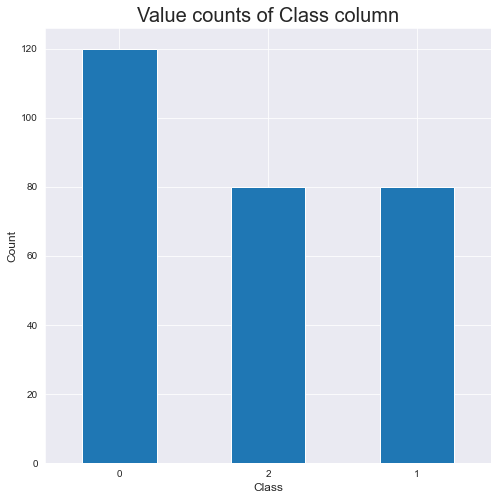

In [395]:
#Target column counts (slight imbalance)

plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
df["Class"].value_counts().plot.bar(rot=0)
plt.title("Value counts of Class column",fontsize = 20)
plt.xlabel("Class",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.savefig("C:/Users/alexk/Desktop/protipa/valuecounts.png", bbox_inches='tight')
plt.show()

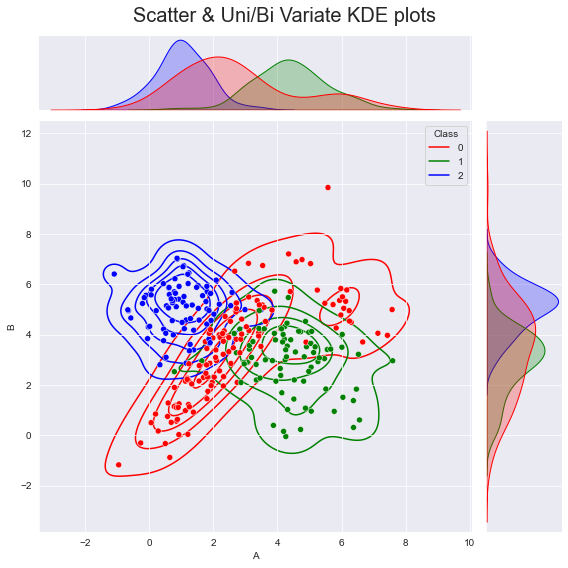

In [396]:
#Basic data visualization / check for normality (lda/qda assumptions)
colors = ["r","g","b"]
g = sns.jointplot(data=df, x="A", y="B", hue="Class",palette=colors,height=8)
g.plot_joint(sns.kdeplot, zorder=0, levels=6)
g.fig.suptitle("Scatter & Uni/Bi Variate KDE plots",fontsize=20)
g.fig.subplots_adjust(top=0.95)
g.fig.tight_layout()

plt.savefig("C:/Users/alexk/Desktop/protipa/scatterkde.png", bbox_inches='tight')
plt.show()

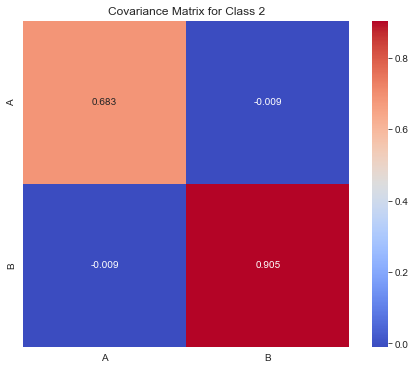

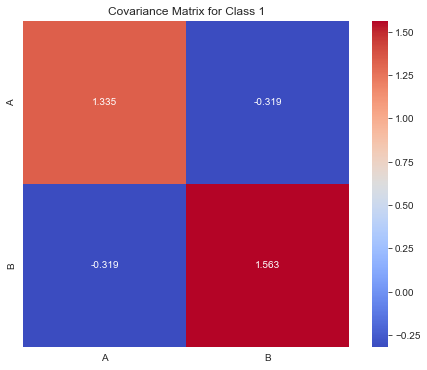

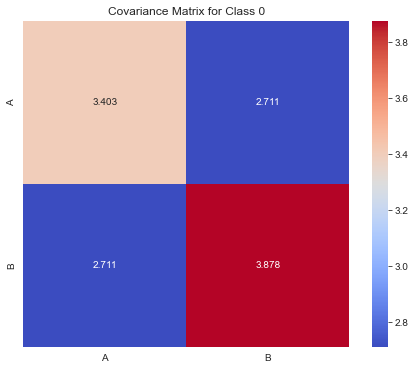

In [26]:
#Heatmaps for per class covariances to check the lda,qda assumptions 

classes = df['Class'].unique()

# Create subplots for each class
for class_label in classes:
    class_data = df[df['Class'] == class_label][['A', 'B']]
    class_covariance = class_data.cov()

    plt.figure(figsize=(8, 6))
    plt.title(f'Covariance Matrix for Class {class_label}')
    sns.heatmap(class_covariance, annot=True, cmap='coolwarm', fmt='.3f', square=True)
    plt.savefig(f"C:/Users/alexk/Desktop/protipa/covariance_{class_label}.png", bbox_inches='tight',dpi = 300)
    plt.show()
    
    


In [19]:
# Split the data into train and test datasets (50%)
# Random state for reproducibility


train, test = train_test_split(df, test_size=0.5,shuffle= True,random_state = 56)

#Seperate data and target

X_train = train[["A","B"]]

y_train = train["Class"]

X_test  = test[["A","B"]]

y_test  = test["Class"]

In [20]:
#Fit LDA on the training data and measure accuracy on test data.

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)


print('LDA model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lda)))

LDA model accuracy score: 0.7929


In [397]:
def decision_boundary_plot(classifier,predictions,title_name,save_name="" ,save = False,save_path="C:/Users/alexk/Desktop/protipa/") :
    
    if save :
        
        if len(save_name)==0 :
            
            raise Exception("No file name given")

    plt.figure(figsize=(12,12))

    #sns.set(context="notebook", style="darkgrid",rc={"axes.axisbelow": False})

    custom_cmap =  ListedColormap(['red','green','blue'])

    #sns.set_style="darkgrid"

    #Use the already fitted model to create the decision surface by making predictions 
    #for a grid of values across the input domain

    #Find the minimum and maximum values for each feature and expand 
    #the grid one step beyond that to ensure the whole feature space is covered.
    x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
    y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1

    #Create a uniform sample across each dimension using the linspace() function and make it really fine with 2000 points
    #Use the meshgrid() function to create a grid from these two vectors.
    xx, yy = np.meshgrid(np.linspace(x_min, x_max,2000),np.linspace(y_min, y_max,2000))

    #Transform meshgrid to an expected form for the predict function. Flatten arrays with ravel function.
    #Create a 2d array from the two 1d arrays using np.c_ function . Then we can use predict without errors.
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 

    #Reshape to the starting meshgrid shape and plot the predicted contour.
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=custom_cmap,alpha = 0.5,zorder = 0)

    # Seperate right wrong predictions to plot them with a different symbol

    tp = (y_test == predictions)  # True Positive
    tp0, tp1,tp2 = tp[y_test == 0], tp[y_test == 1] ,tp[y_test ==2]
    X0, X1,X2 = X_test[y_test == 0], X_test[y_test == 1],X_test[y_test==2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    #plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test,cmap=custom_cmap,edgecolor="k",marker="o")


    plt.scatter(X0_tp.iloc[:, 0], X0_tp.iloc[:, 1], c="red",edgecolor="k",marker="o",label = "0")
    plt.scatter(X0_fp.iloc[:, 0], X0_fp.iloc[:, 1], c="red",marker="x",label = "0 missed")

    plt.scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 1], c="green",edgecolor="k",marker="o",label = "1")
    plt.scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 1], c="green",marker="x",label = "1 missed")

    plt.scatter(X2_tp.iloc[:, 0], X2_tp.iloc[:, 1], c="blue",edgecolor="k",marker="o",label = "2")
    plt.scatter(X2_fp.iloc[:, 0], X2_fp.iloc[:, 1], c="blue",marker="x",label = "2 missed")

    plt.axis("off")
    
    plt.title("Decision Boundary plot of {}".format(title_name),fontsize = 20)

    plt.legend()
    
    if save :

        plt.savefig(f"{save_path}{save_name}", bbox_inches='tight')


    plt.show()

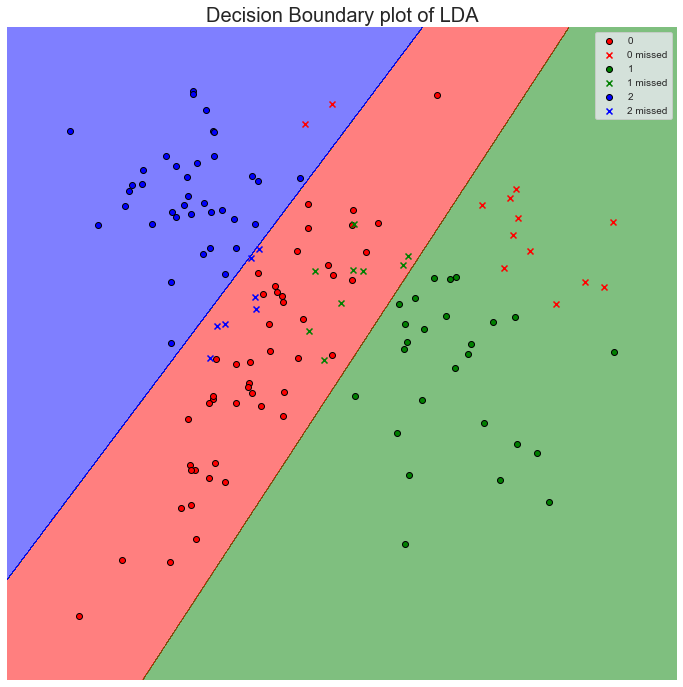

In [398]:
#decision boundary plot for LDA

decision_boundary_plot(lda,y_pred_lda,title_name="LDA",save = True,save_name = "ldadecision")

In [55]:
#Fit QDA on the training data and measure accuracy on test data.

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)


print('QDA model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_qda)))

QDA model accuracy score: 0.8357


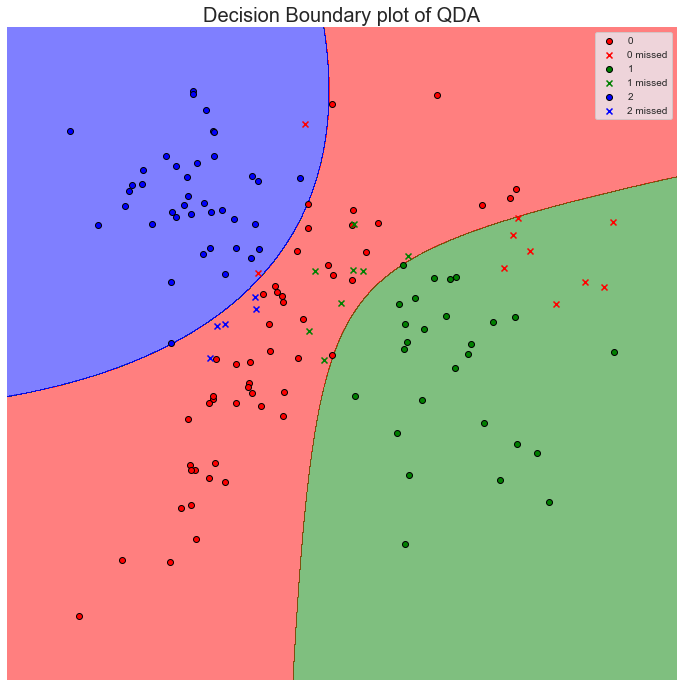

In [399]:
#decision boundary plot for QDA

decision_boundary_plot(qda,y_pred_qda,title_name="QDA",save = True,save_name = "qdadecision")

In [363]:
print('LDA model accuracy score: {}'.format(accuracy_score(y_test, y_pred_lda)))
print('LDA model precision score: {}'.format(precision_score(y_test, y_pred_lda,average="weighted")))
print('LDA model recall score: {}'.format(recall_score(y_test, y_pred_lda,average="weighted")))
print('LDA model f1 score: {}'.format(f1_score(y_test, y_pred_lda,average="weighted")))

LDA model accuracy score: 0.7928571428571428
LDA model precision score: 0.8006298881298881
LDA model recall score: 0.7928571428571428
LDA model f1 score: 0.7953906674316312


In [366]:
print('QDA model accuracy score: {}'.format(accuracy_score(y_test, y_pred_qda)))
print('QDA model precision score: {}'.format(precision_score(y_test, y_pred_qda,average="weighted")))
print('QDA model recall score: {}'.format(recall_score(y_test, y_pred_qda,average="weighted")))
print('QDA model f1 score: {}'.format(f1_score(y_test, y_pred_qda,average="weighted")))

QDA model accuracy score: 0.8357142857142857
QDA model precision score: 0.8390216681184668
QDA model recall score: 0.8357142857142857
QDA model f1 score: 0.8368033613445378


# Exercise 2

In [63]:
#knn classifier with stock hyperparameters

neigh = KNeighborsClassifier()


neigh.fit(X_train, y_train)

y_pred_knn_stock = neigh.predict(X_test)


print('KNN stock model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn_stock)))

KNN stock model accuracy score: 0.8929


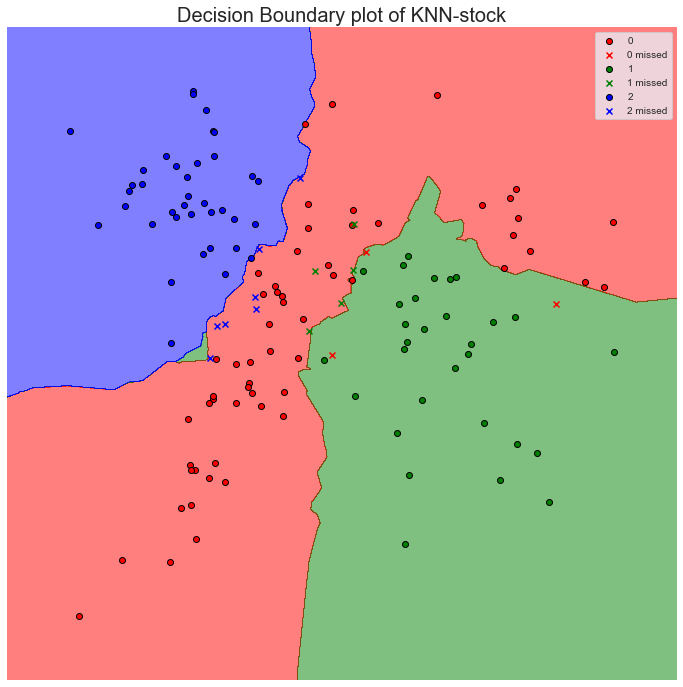

In [400]:
#decision boundary plot for stock KNN

decision_boundary_plot(neigh,y_pred_knn_stock,title_name = "KNN-stock",save = True,save_name = "knnstockdecision")

In [139]:
knn_predictions = []
accuracy_matrix = []
knn_classifier = []
for neighbors in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    
    knn_classifier.append(knn)
    
    knn_predictions.append(y_pred_knn)
    
    accuracy_matrix.append(accuracy_score(y_test, y_pred_knn))

    

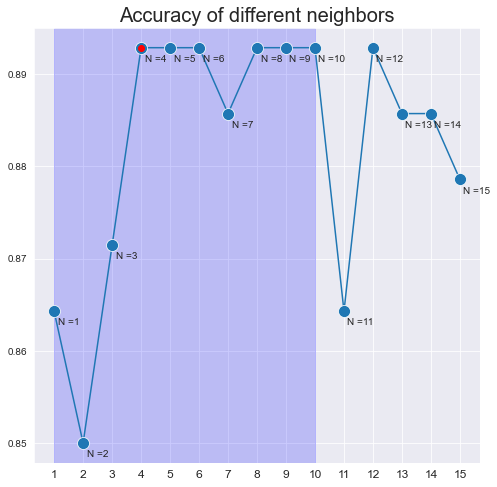

In [401]:
plt.figure(figsize = (8,8))
g = sns.lineplot(data=accuracy_matrix,marker="o",markersize = 12)
g.set_xticks(range(len(accuracy_matrix)))
g.set_xticklabels(np.arange(1,16),fontsize = 12)
plt.title("Accuracy of different neighbors",fontsize = 20)

plt.scatter(accuracy_matrix.index(max(accuracy_matrix)),max(accuracy_matrix), color='red', zorder=5)

#region of interest for the exercise because there are more points created to show the accuracy drop
plt.axvspan(0, 9, color='blue', alpha=0.2)

for i in range(15) :

    g.text(i+0.12,accuracy_matrix[i]-0.0015,"N ={}".format(i+1))
    
plt.savefig("C:/Users/alexk/Desktop/protipa/knnaccuracies", bbox_inches='tight')    
plt.show()

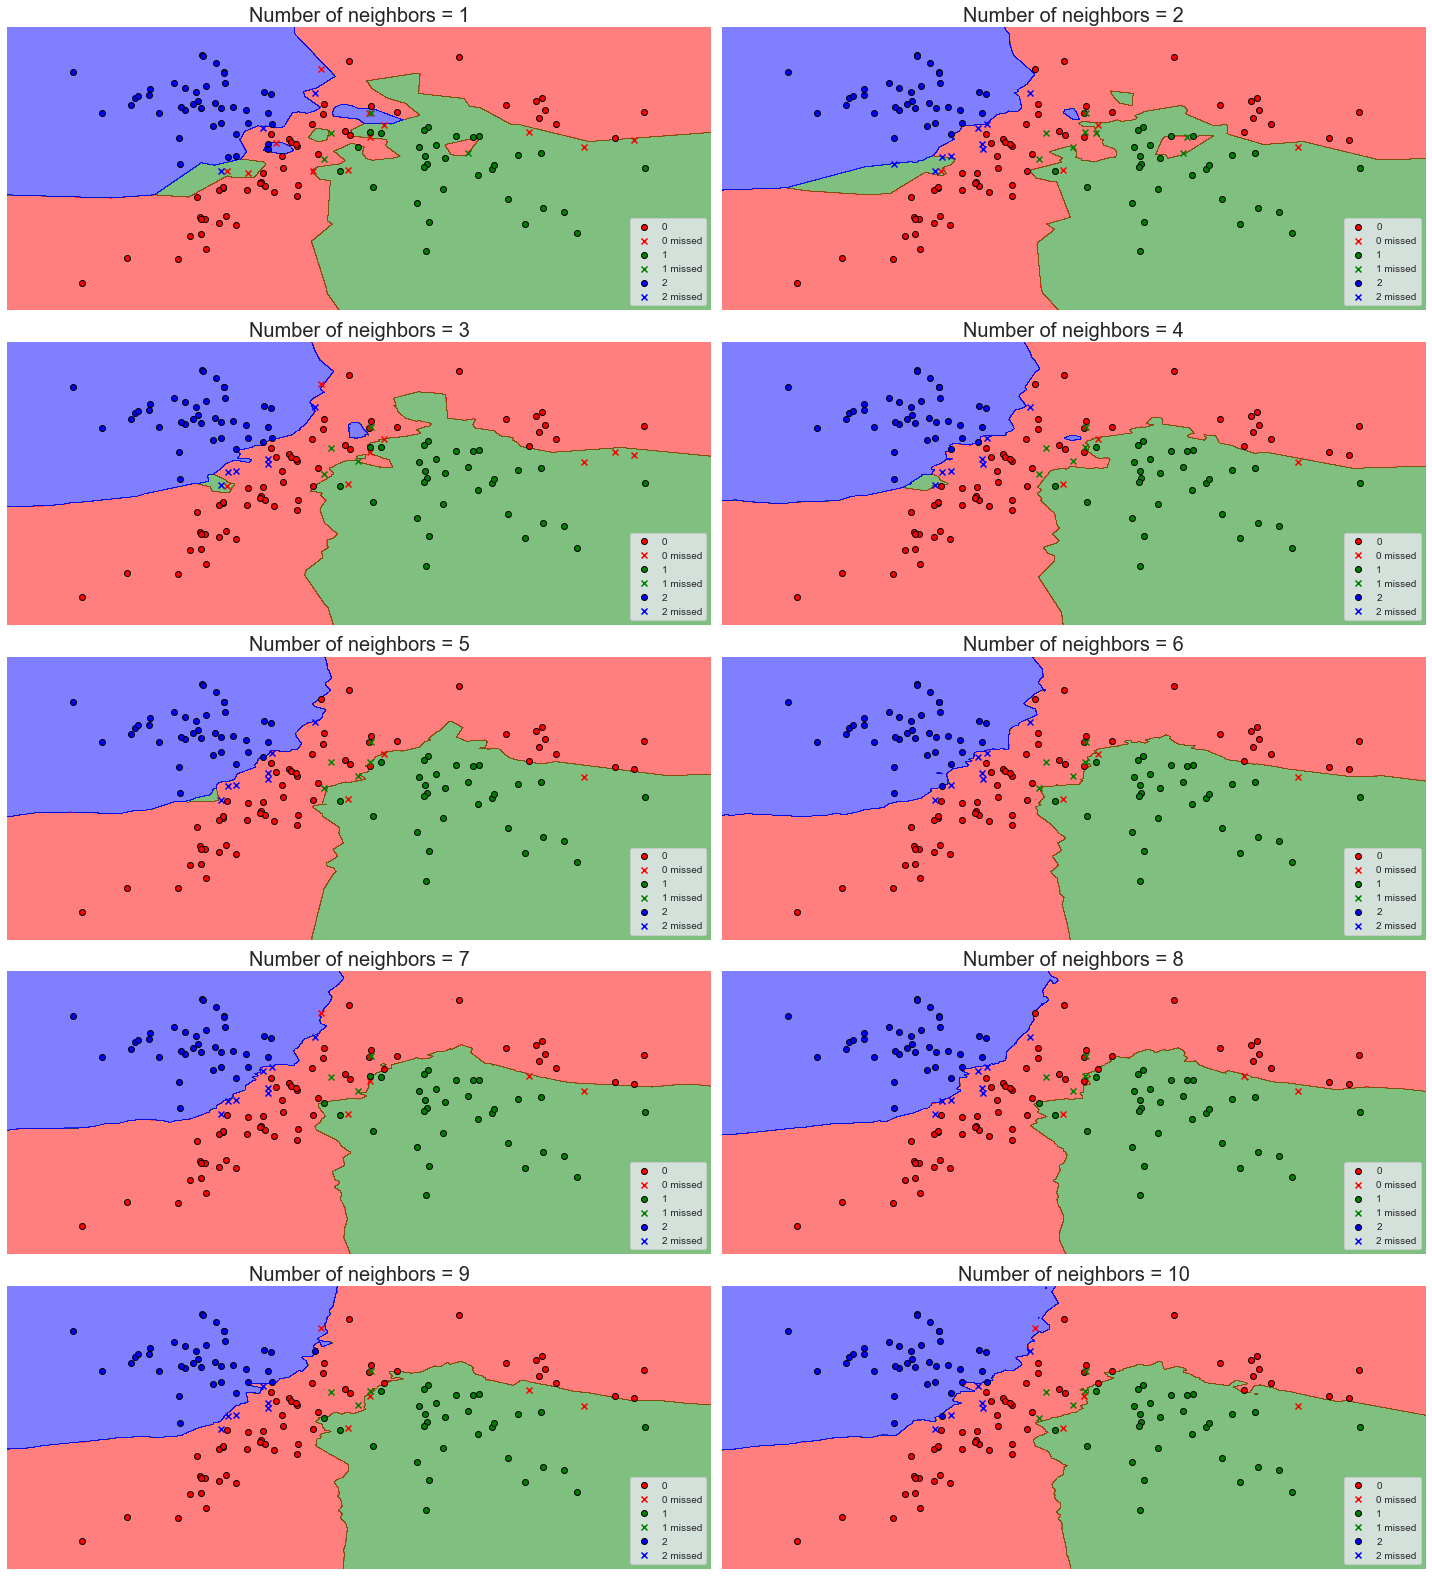

In [402]:
num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 22))

for i in range(num_rows):
    for j in range(num_cols):
        # Calculate the index in the 1D array of subplots
        plot_index = i * num_cols + j
        
        # Check if there are still plots left to create
        if plot_index < len(knn_classifier):
            A = knn_classifier[plot_index]
            B = knn_predictions[plot_index]
            
            #modified decision_boundary_plot func that takes axes argument

            # Create the decision plot for the current A and B values
            custom_cmap =  ListedColormap(['red','green','blue'])


            #Find the minimum and maximum values for each feature and expand 
            #the grid one step beyond that to ensure the whole feature space is covered.
            x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
            y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1

            #Create a uniform sample across each dimension using the linspace() function
            #Use the meshgrid() function to create a grid from these two vectors.
            xx, yy = np.meshgrid(np.linspace(x_min, x_max,2000),np.linspace(y_min, y_max,2000))

            #Transform meshgrid to an expected form for the predict function. Flatten arrays with ravel function.
            #Create a 2d array from the two 1d arrays using np.c_ function . Then we can use predict without errors.
            Z = A.predict(np.c_[xx.ravel(), yy.ravel()]) 

            #Reshape to the starting meshgrid shape and plot the predicted contour.
            Z = Z.reshape(xx.shape)
            axes[i,j].contourf(xx, yy, Z, cmap=custom_cmap,alpha = 0.5,zorder = 0)

            # Seperate right wrong predictions to plot them with a different symbol

            tp = (y_test == B)  # True Positive
            tp0, tp1,tp2 = tp[y_test == 0], tp[y_test == 1] ,tp[y_test ==2]
            X0, X1,X2 = X_test[y_test == 0], X_test[y_test == 1],X_test[y_test==2]
            X0_tp, X0_fp = X0[tp0], X0[~tp0]
            X1_tp, X1_fp = X1[tp1], X1[~tp1]
            X2_tp, X2_fp = X2[tp2], X2[~tp2]

            #plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test,cmap=custom_cmap,edgecolor="k",marker="o")


            axes[i,j].scatter(X0_tp.iloc[:, 0], X0_tp.iloc[:, 1], c="red",edgecolor="k",marker="o",label = "0")
            axes[i,j].scatter(X0_fp.iloc[:, 0], X0_fp.iloc[:, 1], c="red",marker="x",label = "0 missed")

            axes[i,j].scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 1], c="green",edgecolor="k",marker="o",label = "1")
            axes[i,j].scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 1], c="green",marker="x",label = "1 missed")

            axes[i,j].scatter(X2_tp.iloc[:, 0], X2_tp.iloc[:, 1], c="blue",edgecolor="k",marker="o",label = "2")
            axes[i,j].scatter(X2_fp.iloc[:, 0], X2_fp.iloc[:, 1], c="blue",marker="x",label = "2 missed")

            axes[i,j].axis("off")

            axes[i,j].legend(fontsize=10)



                
            axes[i, j].set_title(f'Number of neighbors = {plot_index + 1}',fontsize=20)
                #axes[i, j].grid(True)  # Add grid for better visualization
        else:
            # If there are no more plots, remove the empty subplot
            fig.delaxes(axes[i, j])

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.savefig("C:/Users/alexk/Desktop/protipa/knnaalldecision", bbox_inches='tight') 

# Show the plots
plt.show()

In [385]:
print('Knn (5 neigh) model accuracy score: {}'.format(accuracy_score(y_test, y_pred_knn_stock)))
print('Knn (5 neigh) model precision score: {}'.format(precision_score(y_test, y_pred_knn_stock,average="weighted")))
print('Knn (5 neigh) model recall score: {}'.format(recall_score(y_test, y_pred_knn_stock,average="weighted")))
print('Knn (5 neigh) model f1 score: {}'.format(f1_score(y_test, y_pred_knn_stock,average="weighted")))

Knn (5 neigh) model accuracy score: 0.8928571428571429
Knn (5 neigh) model precision score: 0.9025788497217069
Knn (5 neigh) model recall score: 0.8928571428571429
Knn (5 neigh) model f1 score: 0.8935367927210466


# Exercise 3


In [187]:
#linear svc fit and test

linear_svc = SVC(kernel="linear",C = 4)


linear_svc.fit(X_train, y_train)

y_pred_linearsvc = linear_svc.predict(X_test)


print('Linear SVC stock model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_linearsvc)))

Linear SVC stock model accuracy score: 0.8286


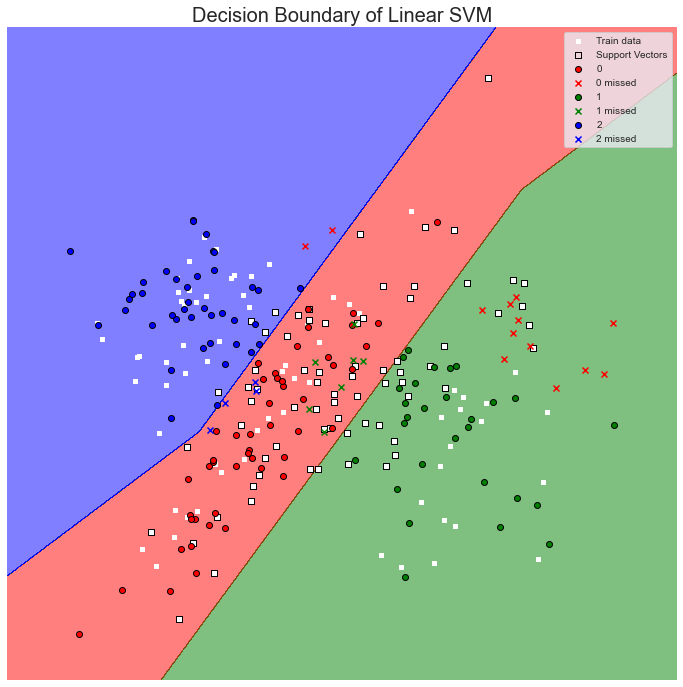

In [386]:
plt.figure(figsize=(12,12))

#sns.set(context="notebook", style="darkgrid",rc={"axes.axisbelow": False})

custom_cmap =  ListedColormap(['red','green','blue'])

#sns.set_style="darkgrid"

#Use the already fitted model to create the decision surface by making predictions 
#for a grid of values across the input domain

#Find the minimum and maximum values for each feature and expand 
#the grid one step beyond that to ensure the whole feature space is covered.
x_min, x_max = min(X_train.iloc[:, 0].min(),X_test.iloc[:, 0].min()) - 1, max(X_train.iloc[:, 0].max(),X_test.iloc[:, 0].max()) + 1
y_min, y_max = min(X_train.iloc[:, 1].min(),X_test.iloc[:, 0].min()) - 1, max(X_train.iloc[:, 1].max(),X_test.iloc[:, 0].max()) + 1

#Create a uniform sample across each dimension using the linspace() function
#Use the meshgrid() function to create a grid from these two vectors.
xx, yy = np.meshgrid(np.linspace(x_min, x_max,2000),np.linspace(y_min, y_max,2000))

#Transform meshgrid to an expected form for the predict function. Flatten arrays with ravel function.
#Create a 2d array from the two 1d arrays using np.c_ function . Then we can use predict without errors.
Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 

#Reshape to the starting meshgrid shape and plot the predicted contour.
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=custom_cmap,alpha = 0.5,zorder = 0)



# Seperate right wrong predictions to plot them with a different symbol

tp = (y_test == y_pred_linearsvc)  # True Positive
tp0, tp1,tp2 = tp[y_test == 0], tp[y_test == 1] ,tp[y_test ==2]
X0, X1,X2 = X_test[y_test == 0], X_test[y_test == 1],X_test[y_test==2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]

#plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test,cmap=custom_cmap,edgecolor="k",marker="o")

#this time also plot train data and support vectors

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c="white",marker="s",label = "Train data",s=10)

#get support vectors
support_vectors = linear_svc.support_vectors_

# Visualize support vectors
#plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1],edgecolors="k",facecolors='None' ,marker="s",label = "Support Vectors")


plt.scatter(X0_tp.iloc[:, 0], X0_tp.iloc[:, 1], c="red",edgecolor="k",marker="o",label = "0")
plt.scatter(X0_fp.iloc[:, 0], X0_fp.iloc[:, 1], c="red",marker="x",label = "0 missed")

plt.scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 1], c="green",edgecolor="k",marker="o",label = "1")
plt.scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 1], c="green",marker="x",label = "1 missed")

plt.scatter(X2_tp.iloc[:, 0], X2_tp.iloc[:, 1], c="blue",edgecolor="k",marker="o",label = "2")
plt.scatter(X2_fp.iloc[:, 0], X2_fp.iloc[:, 1], c="blue",marker="x",label = "2 missed")

plt.axis("off")

plt.legend()

plt.title("Decision Boundary of Linear SVM",fontsize = 20)

plt.savefig("C:/Users/alexk/Desktop/protipa/linearsvmdecision", bbox_inches='tight') 

plt.show()

In [387]:
print('Linear SVM  model accuracy score: {}'.format(accuracy_score(y_test, y_pred_linearsvc)))
print('Linear SVM  model precision score: {}'.format(precision_score(y_test, y_pred_linearsvc,average="weighted")))
print('Linear SVM  model recall score: {}'.format(recall_score(y_test, y_pred_linearsvc,average="weighted")))
print('Linear SVM  model f1 score: {}'.format(f1_score(y_test, y_pred_linearsvc,average="weighted")))

Linear SVM  model accuracy score: 0.8285714285714286
Linear SVM  model precision score: 0.8332863262645345
Linear SVM  model recall score: 0.8285714285714286
Linear SVM  model f1 score: 0.8301194217473288


In [223]:
#rbf kernel Svm hyperparameter tuning (C and Gamma)

C_range_ = [1, 1e2,1e3]
gamma_range_ = [1e-2,1e-1, 1]
svm_classifiers = []
svm_predictions = []
accuracy_matrix_svm = []
for C in C_range_:
    for gamma in gamma_range_:
        svm_rbf = SVC(C=C, gamma=gamma)
        svm_rbf.fit(X_train, y_train)
        svm_classifiers.append(svm_rbf)
        
        y_pred_svm = svm_rbf.predict(X_test)
    
        
    
        svm_predictions.append(y_pred_svm)
    
        accuracy_matrix_svm.append(accuracy_score(y_test, y_pred_svm))

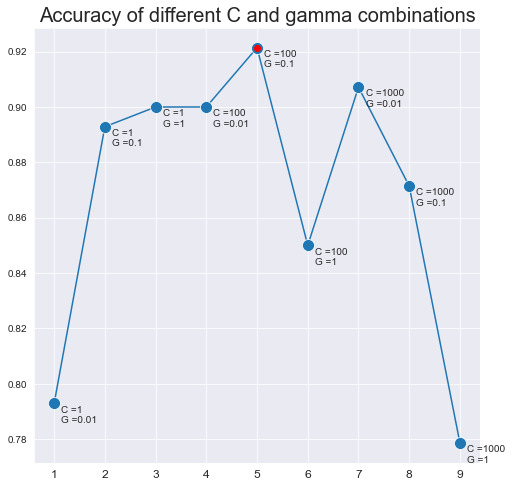

In [393]:

plt.figure(figsize = (8,8))
g = sns.lineplot(data=accuracy_matrix_svm,marker="o",markersize = 12)
g.set_xticks(range(len(accuracy_matrix_svm)))
g.set_xticklabels(np.arange(1,10),fontsize = 12)
plt.title("Accuracy of different C and gamma combinations",fontsize = 20)

plt.scatter(accuracy_matrix_svm.index(max(accuracy_matrix_svm)),max(accuracy_matrix_svm), color='red', zorder=5)

for i in range(9) :
    
    C_ = int(svm_classifiers[i].get_params()["C"])
    gamma_ = svm_classifiers[i].get_params()["gamma"]
    
    g.text(i+0.14,accuracy_matrix_svm[i]-0.007,"C ={}\nG ={}".format(C_,gamma_))

plt.savefig("C:/Users/alexk/Desktop/protipa/rbfsvmaccuracies", bbox_inches='tight') 
    
plt.show()

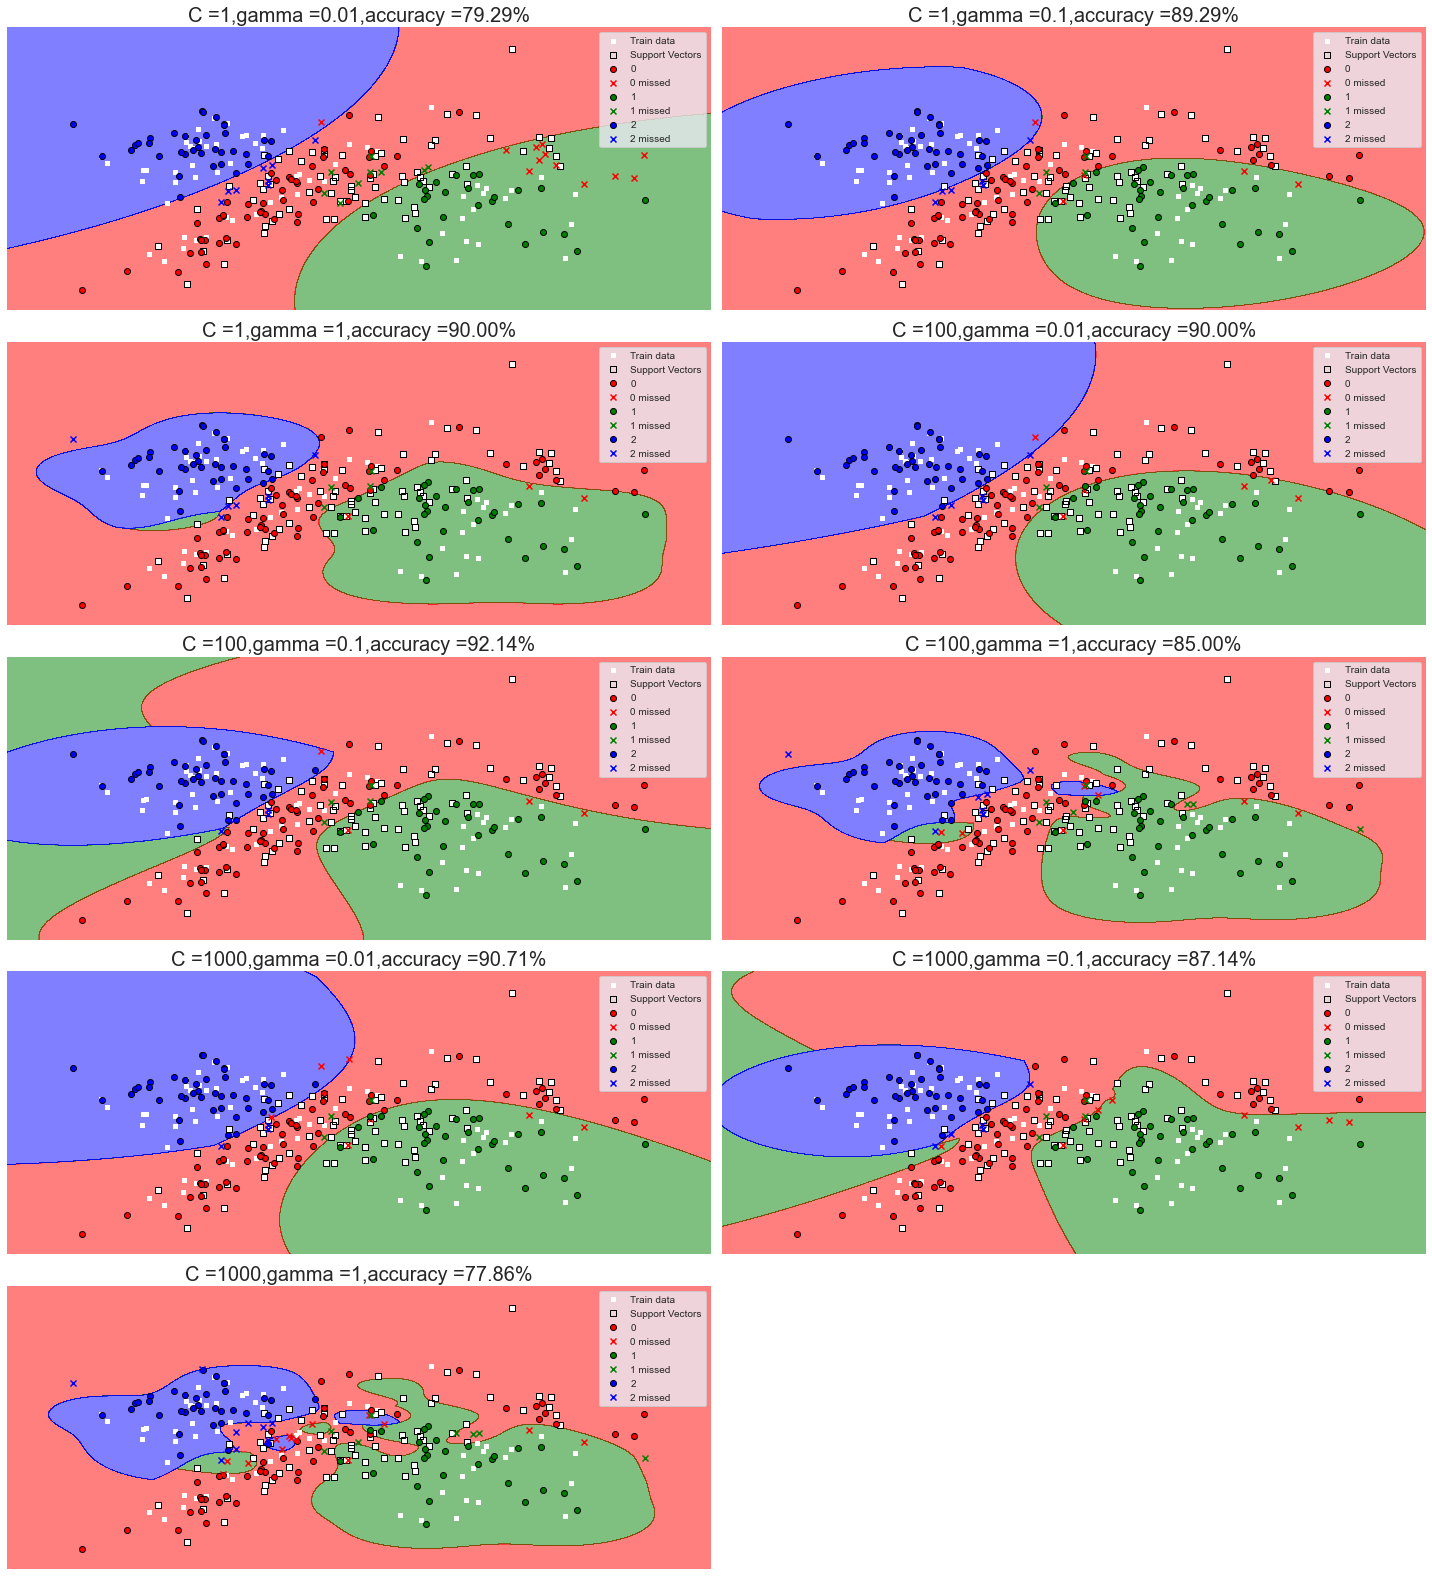

In [394]:
num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 22))

for i in range(num_rows):
    for j in range(num_cols):
        # Calculate the index in the 1D array of subplots
        plot_index = i * num_cols + j
        
        # Check if there are still plots left to create
        if plot_index < len(svm_classifiers):
            A = svm_classifiers[plot_index]
            B = svm_predictions[plot_index]
            
            #modified decision_boundary_plot func that takes axes argument

            # Create the decision plot for the current A and B values
            custom_cmap =  ListedColormap(['red','green','blue'])


            #Find the minimum and maximum values for each feature and expand 
            #the grid one step beyond that to ensure the whole feature space is covered.
            x_min, x_max = min(X_train.iloc[:, 0].min(),X_test.iloc[:, 0].min()) - 1, max(X_train.iloc[:, 0].max(),X_test.iloc[:, 0].max()) + 1
            y_min, y_max = min(X_train.iloc[:, 1].min(),X_test.iloc[:, 0].min()) - 1, max(X_train.iloc[:, 1].max(),X_test.iloc[:, 0].max()) + 1

            #Create a uniform sample across each dimension using the linspace() function
            #Use the meshgrid() function to create a grid from these two vectors.
            xx, yy = np.meshgrid(np.linspace(x_min, x_max,2000),np.linspace(y_min, y_max,2000))

            #Transform meshgrid to an expected form for the predict function. Flatten arrays with ravel function.
            #Create a 2d array from the two 1d arrays using np.c_ function . Then we can use predict without errors.
            Z = A.predict(np.c_[xx.ravel(), yy.ravel()]) 

            #Reshape to the starting meshgrid shape and plot the predicted contour.
            Z = Z.reshape(xx.shape)
            axes[i,j].contourf(xx, yy, Z, cmap=custom_cmap,alpha = 0.5,zorder = 0)

            # Seperate right wrong predictions to plot them with a different symbol

            tp = (y_test == B)  # True Positive
            tp0, tp1,tp2 = tp[y_test == 0], tp[y_test == 1] ,tp[y_test ==2]
            X0, X1,X2 = X_test[y_test == 0], X_test[y_test == 1],X_test[y_test==2]
            X0_tp, X0_fp = X0[tp0], X0[~tp0]
            X1_tp, X1_fp = X1[tp1], X1[~tp1]
            X2_tp, X2_fp = X2[tp2], X2[~tp2]

            #plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test,cmap=custom_cmap,edgecolor="k",marker="o")
            
            axes[i,j].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c="white",marker="s",label = "Train data",s=10)

            support_vectors = linear_svc.support_vectors_

            # Visualize support vectors
            #plt.scatter(X_train[:,0], X_train[:,1])
            axes[i,j].scatter(support_vectors[:,0], support_vectors[:,1],edgecolors="k",facecolors='None' ,marker="s",label = "Support Vectors")


            axes[i,j].scatter(X0_tp.iloc[:, 0], X0_tp.iloc[:, 1], c="red",edgecolor="k",marker="o",label = "0")
            axes[i,j].scatter(X0_fp.iloc[:, 0], X0_fp.iloc[:, 1], c="red",marker="x",label = "0 missed")

            axes[i,j].scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 1], c="green",edgecolor="k",marker="o",label = "1")
            axes[i,j].scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 1], c="green",marker="x",label = "1 missed")

            axes[i,j].scatter(X2_tp.iloc[:, 0], X2_tp.iloc[:, 1], c="blue",edgecolor="k",marker="o",label = "2")
            axes[i,j].scatter(X2_fp.iloc[:, 0], X2_fp.iloc[:, 1], c="blue",marker="x",label = "2 missed")

            axes[i,j].axis("off")

            axes[i,j].legend(fontsize=10)
            
            C_ = int(svm_classifiers[plot_index].get_params()["C"])
            gamma_ = svm_classifiers[plot_index].get_params()["gamma"]
    
            

            acc_ = '%.2f'%(accuracy_matrix_svm[plot_index]*100)

                
            axes[i, j].set_title("C ={},gamma ={},accuracy ={}%".format(C_,gamma_,acc_),fontsize = 20)
                #axes[i, j].grid(True)  # Add grid for better visualization
        else:
            # If there are no more plots, remove the empty subplot
            fig.delaxes(axes[i, j])

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.savefig("C:/Users/alexk/Desktop/protipa/rbfsvmalldecisions", bbox_inches='tight') 
# Show the plots
plt.show()

In [388]:
#best rbf svm fit and results

best_svm_kernel = SVC(C=100, gamma=0.1)


best_svm_kernel.fit(X_train, y_train)

y_pred_bestsvmkernel = best_svm_kernel.predict(X_test)


print('Best kernel SVM  model accuracy score: {}'.format(accuracy_score(y_test, y_pred_bestsvmkernel)))
print('Best kernel SVM  model precision score: {}'.format(precision_score(y_test, y_pred_bestsvmkernel,average="weighted")))
print('Best kernel SVM  model recall score: {}'.format(recall_score(y_test, y_pred_bestsvmkernel,average="weighted")))
print('Best kernel SVM  model f1 score: {}'.format(f1_score(y_test, y_pred_bestsvmkernel,average="weighted")))

Best kernel SVM  model accuracy score: 0.9214285714285714
Best kernel SVM  model precision score: 0.9224489795918367
Best kernel SVM  model recall score: 0.9214285714285714
Best kernel SVM  model f1 score: 0.9216723823813098
